# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

# I. Data Validation

The dataset initially comprised 15,000 rows and 8 columns, containing a mix of three categorical and five numerical features before undergoing the validation and cleaning process. The following steps were taken to ensure data accuracy:

- **Week (`week`)**: This integer variable, representing weeks since the product launch, exhibits 6 unique values ranging from 1 to 6. No cleaning was required for this column.

- **Sales Method (`sales_method`)**: This categorical variable represents different sales approaches. Ideally, it should have had 3 unique values, but there were 5 due to inconsistencies, with "em + call" and "email" appearing as typos or variations of "Email" and "Email + Call". These inconsistencies were rectified for data integrity.

- **Customer ID (`customer_id`)**: Serving as a unique identifier for customers, there were 15,000 unique customer IDs in this categorical variable, used to uniquely identify customers. No cleaning was necessary for this column.

- **Number of Sold Items (`nb_sold`)**: An integer variable, which exhibited 10 unique values, indicating the number of new products sold. It is categorized as a discrete numerical variable, and no cleaning was needed for this column.

- **Revenue (`revenue`)**: This continuous numerical variable, represented as a float, was the only variable in the dataset with missing data. Specifically, there were 1074 missing values, accounting for approximately 7.16% of the data within the `revenue` variable. In response, the missing values were imputed to maximize the available data. In this case, median imputation was chosen due to the right-skewed distribution of the `revenue` variable. The imputation process was successfully completed.

- **Years as Customer (`years_as_customer`)**: This integer variable initially exhibited 42 unique values, reflecting the number of years as a customer. However, it should ideally have contained only 40 unique values (ranging from 0 to 39), aligning with the age of the company, which is 39 years (as of 2023, subtracting the founding year of 1984). Anomalies in this variable were identified in two rows and subsequently removed to ensure data accuracy.

- **Number of Site Visits (`nb_site_visits`)**: This integer variable presented 27 unique values, representing the number of site visits. It was another discrete numerical variable, and no cleaning was required for this column.

- **State (`state`)**: A categorical variable with 50 unique values, indicating different states in the US. It's categorized as a categorical variable with a relatively large number of categories. No cleaning was necessary for this column.

Following the data validation and cleaning steps, the dataset was refined, resulting in a final dataset with **14,998 records and 8 columns**, with no missing values, anomalies, or duplicates. This refined dataset ensures data accuracy and integrity.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import f_oneway, chi2_contingency

palette = {'Email': '#3498DB', 'Call': '#E74C3C', 'Email + Call': '#2ECC71'}

# Set the Seaborn theme for better visualization
sns.set_theme(style='whitegrid')

# Configure the figure format for better display
%config InlineBackend.figure_format = 'retina'

# Customize the plot: Remove top and right spines
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

## 1.1. Basic Information 

In [3]:
# Load the dataset and view the first few rows
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [4]:
# Display a total of rows and cols
df.shape

(15000, 8)

In [5]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [6]:
# Check for duplicates
df.duplicated().sum()

0

## 1.2. Some key insights

In [7]:
# Describe some statistics about numerical data
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [8]:
# Generate a summary of unique values, data types, and missing values for each column
data = []
for col in df.columns:
    unique_values = df[col].unique()
    num_unique = len(unique_values)
    dtype = df[col].dtype
    missing = df[col].isna().sum()
    if num_unique > 50:
        data.append((col, num_unique, "", dtype, missing))
    else:
        unique_values_str = ", ".join(map(str, unique_values))
        data.append((col, num_unique, unique_values_str, dtype, missing))

summary = pd.DataFrame(data, columns=["Column", "# of Uniques", "Unique Values (<10)", "Dtype", 'Missing'])
summary.sort_values(by='# of Uniques').reset_index(drop=True)

,Column,# of Uniques,Unique Values (<10),Dtype,Missing
0,sales_method,5,"Email, Email + Call, Call, em + call, email",object,0
1,week,6,"2, 6, 5, 4, 3, 1",int64,0
2,nb_sold,10,"10, 15, 11, 9, 13, 8, 12, 7, 14, 16",int64,0
3,nb_site_visits,27,"24, 28, 26, 25, 22, 31, 23, 30, 21, 27, 32, 29...",int64,0
4,years_as_customer,42,"0, 1, 6, 3, 10, 9, 7, 4, 2, 20, 8, 5, 17, 36, ...",int64,0
5,state,50,"Arizona, Kansas, Wisconsin, Indiana, Illinois,...",object,0
6,revenue,6744,,float64,1074
7,customer_id,15000,,object,0


## 1.3. Data cleaning

In [9]:
# Clean `sales_method` variable
# -----------------------------------
# Check total value
df['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [10]:
# Replace inconsistent values in the "sales_method" column

# Replace inconsistent values in the "sales_method" column
df['sales_method'] = df['sales_method'].replace(r'\w\w\s\+\scall', 'Email + Call', regex=True)
df['sales_method'] = df['sales_method'].replace('email', 'Email')

In [11]:
# Confirm only 3 unique values
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [12]:
# Clean `revenue` variable
# -----------------------------------
# Calculate the percentage of missing values for `revenue`
missing_percentage = df['revenue'].isnull().sum() / len(df) * 100
missing_percentage

7.16

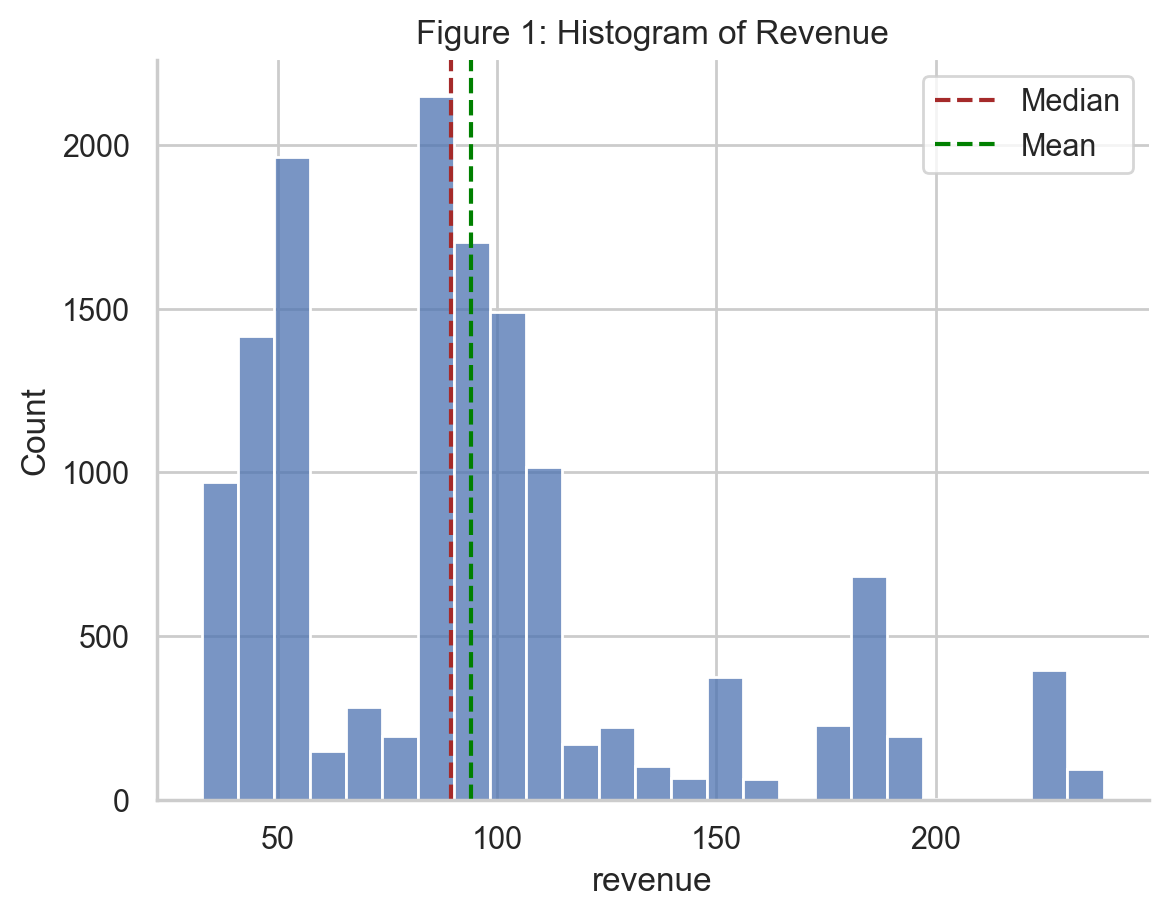

In [13]:
# Check the distribution of the `revenue`
sns.histplot(data=df, x='revenue', bins=25)
plt.title("Figure 1: Histogram of Revenue")
plt.axvline(df['revenue'].median(), color='brown', linestyle='--', label='Median')
plt.axvline(df['revenue'].mean(), color='green', linestyle='--', label='Mean')
plt.legend();

In [14]:
# Impute missing values with median
revenue_median = df['revenue'].median()
df['revenue'] = df['revenue'].fillna(revenue_median)

In [15]:
# Confirm no missing values
df['revenue'].isna().sum()

0

In [16]:
# Clean `years_as_customers` variable
# -----------------------------------
# Calculate the threshold based on the current year and the founding year (1984)
years_threshold = datetime.now().year - 1984

# Filter the df to find rows with 'years_as_customer' greater than the threshold
df[df['years_as_customer'] > years_threshold]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [17]:
# Remove anomalies from df
df = df[~(df['years_as_customer'] > years_threshold)]

In [18]:
# Recheck info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               14998 non-null  int64  
 1   sales_method       14998 non-null  object 
 2   customer_id        14998 non-null  object 
 3   nb_sold            14998 non-null  int64  
 4   revenue            14998 non-null  float64
 5   years_as_customer  14998 non-null  int64  
 6   nb_site_visits     14998 non-null  int64  
 7   state              14998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB


# II. Exploratory Data Analysis
## 2.1. Number of Customers for Each Approach

Upon examining the data with `value_counts` and referencing `Figure 2`, the distribution of customers approached via different methods is as follows:

- **Email**: The "Email" approach was employed with 7465 customers, constituting approximately 50% of the total approaches.

- **Call**: The "Call" approach was utilized with 4961 customers, accounting for roughly 33% of the approaches.

- **Email + Call**: The "Email + Call" method had the lowest number of customers approached, totaling 2572, which corresponds to approximately 17% of the total approaches.

In [19]:
df['sales_method'].value_counts(normalize=True).round(2)

Email           0.50
Call            0.33
Email + Call    0.17
Name: sales_method, dtype: float64

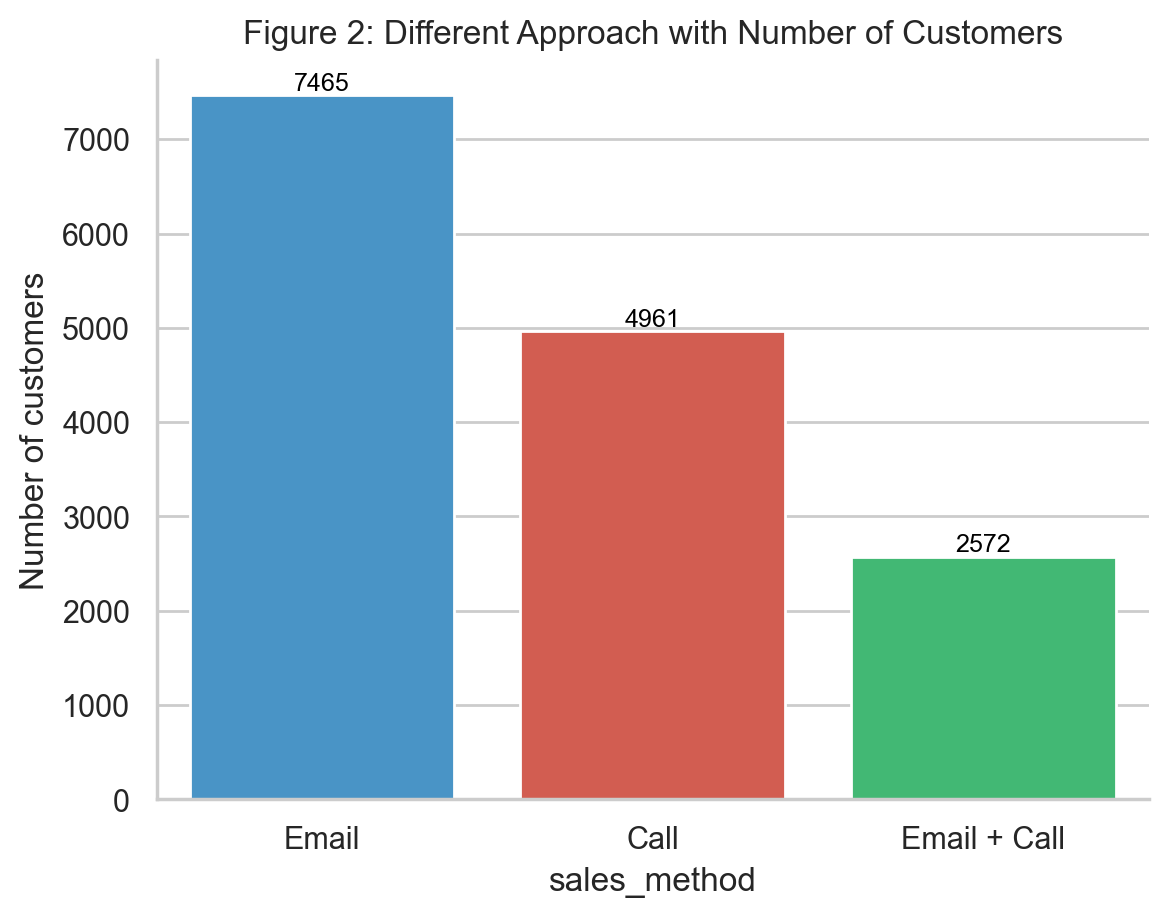

In [20]:
# Plot each sales approach with number of customers
sns.countplot(data=df, x='sales_method',  order=df['sales_method'].value_counts().index, palette=palette)
plt.title(f"Figure 2: Different Approach with Number of Customers")
plt.ylabel("Number of customers")
for i, v in enumerate(df['sales_method'].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom', color='black', fontsize=9)

## 2.2. Revenue Analysis

### 2.2.1. Revenue Insights

In our exploration of revenue, supported by the descriptive table, `Figure 1` and `Figure 3`, several key findings emerge:

- **Skewed Distribution:** The revenue distribution exhibits a right-skewed pattern, signifying that the majority of revenue values are concentrated towards the lower end of the scale, with a significant proportion of revenue falls under the \$100.

- **Revenue Range:** The recorded revenue spans from a minimum of \$32.54 to a maximum of $238.32, illustrating a wide range of transaction values.

- **Measures of Central Tendency:** The median revenue, at approximately \$89.5, is marginally lower than the mean revenue, which stands at $93.62. This supports for the skewness above.

- **Spread (Standard Deviation):** The standard deviation (std) of $45.75 quantifies the extent of dispersion in the revenue data. A high standard deviation implies a widely spread of revenue values.

- **Outliers:** The boxplot indicates that values exceeding \$160 are considered outliers. Notably, two distinct groups of outliers can be identified, one around the \$180 and another at the higher end of the revenue scale.

Incorporating these insights, we can better understand the revenue distribution in association with the various approaches used. 

In [21]:
df[['revenue']].describe(percentiles=[.05, .25, .5, .75, .95]).round(2).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
revenue,14998.0,93.62,45.72,32.54,39.47,53.04,89.5,106.07,188.27,238.32


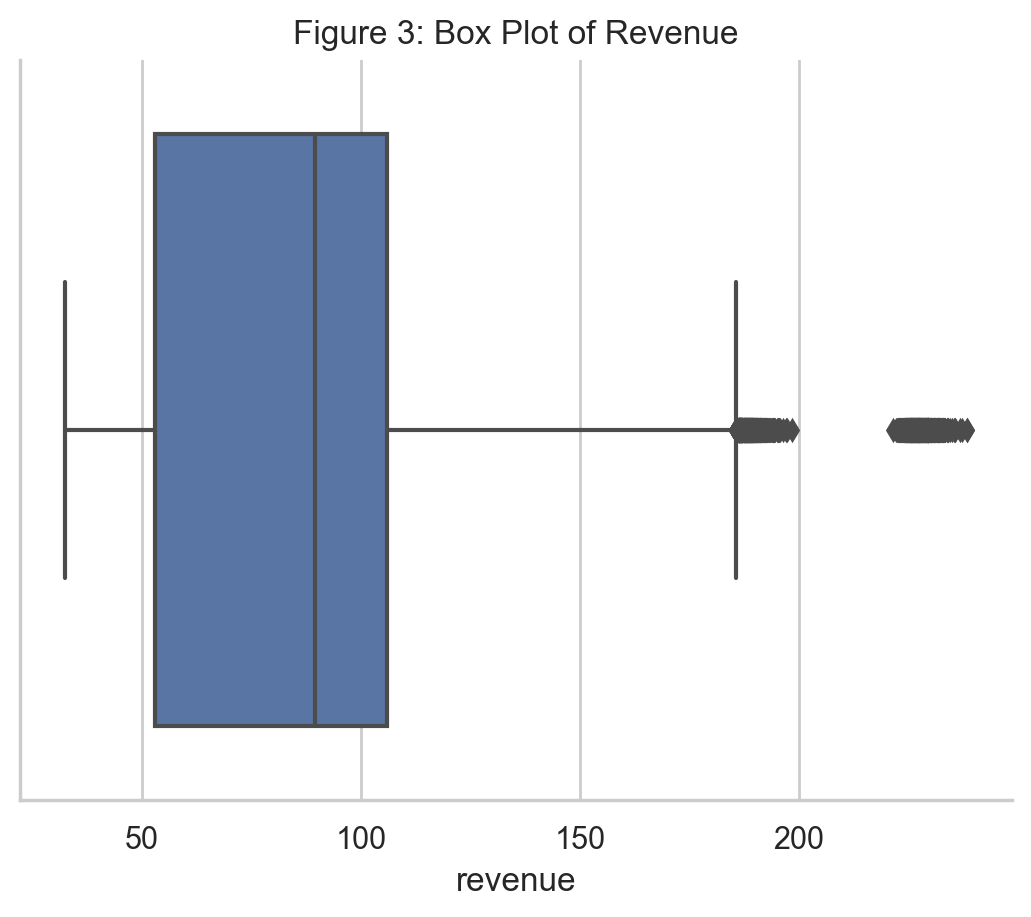

In [22]:
# Visualize revenue
sns.boxplot(data=df, x='revenue')
plt.title("Figure 3: Box Plot of Revenue");

### 2.2.2. Revenue by Sales Approach

From the summarized Revenue by Sales Approach in the `grouped revenue table` and `Figure 4`, several key insights emerge:

- **Total Revenue by Each Approach**: Email stands out as the top revenue generator, which aligns with its extensive customer outreach. However, what's intriguing is that "Email + Call" secures the second position in terms of total revenue, amassing nearly \$440k, almost twice the revenue of "Call," which achieves only $243k in total.

- **Revenue Range Per Customer Variation**: "Email + Call" exhibits the widest range, spanning from \$89.5 to \$238.32, indicating high variability and high revenue. In contrast, "Call" has a narrower range, from \$32.54 to \$89.5, suggiesting low variability, and "Email" ranges from \$78.83 to \$148.97. 

- **Concentration of Values**: A deeper analysis reveals that the majority of revenue for "Email + Call" clusters around \$170.88, demonstrating the highest average revenue per customer. This figure is nearly double that of "Email" (\$96.57) and approximately four times that of "Call" (\$49.13). 

These findings offer a fascinating perspective on revenue generation. While "Email" dominates in terms of total revenue, the remarkable performance of "Email + Call" stands out with its higher average revenue and broader revenue range. "Call," on the other hand, faces challenges despite significant efforts (approximately 30 minutes per customer), and the average revenue earned per customer remains relatively low after 6 weeks.

In [23]:
# Group revenue by 'sales_method' and calculate the sum and percentage of revenue
result = df.groupby('sales_method')['revenue'].agg(['sum', lambda x: x.sum() / df['revenue'].sum() * 100, 'min', 'mean','max'])

# Rename the columns of revenue table
result.columns = ['total', 'percentage', 'min', 'avg', 'max']

result.round(2).sort_values(by='total', ascending=False)

,total,percentage,min,avg,max
sales_method,,,,,
Email,720908.61,51.34,78.83,96.57,148.97
Email + Call,439492.19,31.30,89.50,170.88,238.32
Call,243712.52,17.36,32.54,49.13,89.50


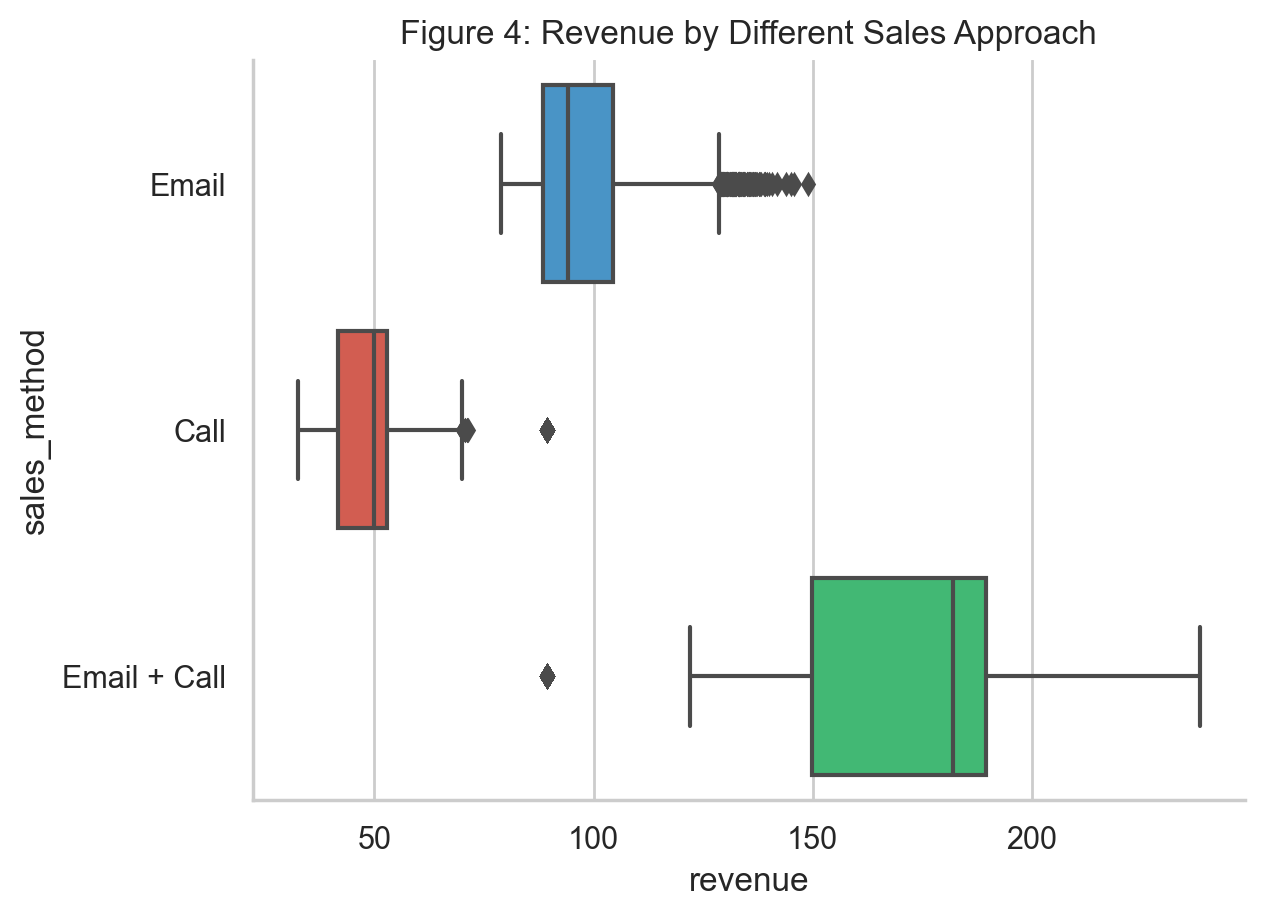

In [24]:
sns.boxplot(data=df, x='revenue', y='sales_method', palette=palette, order = ['Email', 'Call', 'Email + Call'])
plt.title("Figure 4: Revenue by Different Sales Approach");

## 2.3. Revenue over Time for Each Approach

Adds the element of time (`week`) to revenue, we've got `Figure 5` and `Figure 6` to conduct further expands our insights:

- **Revenue Trends Over Time**: While the total revenue of "Email" decreases as weeks progessed, the opposite was true for "Call" and "Email + Call".

- **"Email" Revenue**: The total revenue generated by "Email" demonstrates a decline as the weeks progress. It begins impressively with almost \$250k in the first week but decreases to just over \$100k in the second week. There's a slight resurgence in week 4 due to follow-up emails, but it subsequently drops significantly to just under $25k in the sixth week - being the lowest revenue acquired in week 6. 

- **"Call" Revenue**: In contrast, "Call" starts the first week with strong revenue, reaching almost \$30k, but its revenue growth remains limited. It reaches a peak of approximately \$55k in the fifth week. 

- **"Email + Call" Revenue**: "Email + Call" displays a different trajectory. It experiences a surge in the third week, reaching \$50k. In week 5 and 6, this approach brought highest revenue earned around \$130k.

- **"Comparison"**: From the third week onwards, "Email + Call" starts to consistently outperform the cumulative revenue of the "Call" approach, and this difference becomes more significant as the weeks progress. This indicates that "Email + Call" becomes more lucrative than "Call" over time. Meanwhile, "Email" seems to be more effective in the first few weeks after launching but decreased as time went by.

In [25]:
# Group the revenue by `sales_method` and `week` 
group_revenue_by_method_week = df.groupby(['sales_method', 'week'])['revenue'].sum().reset_index()
# Calculate cumulative revenue over weeks
group_revenue_by_method_week['cumulative_revenue'] = group_revenue_by_method_week.groupby('sales_method')['revenue'].cumsum()
# Pivot the results
revenue_by_method_week = group_revenue_by_method_week.pivot(index='week', columns='sales_method', values='revenue')
cummulative_revenue_by_method_week = group_revenue_by_method_week.pivot(index='week', columns='sales_method', values='cumulative_revenue')

# Re-order the columns in the pivot table
revenue_by_method_week = revenue_by_method_week[['Email', 'Call', 'Email + Call']]
cummulative_revenue_by_method_week = cummulative_revenue_by_method_week[['Email', 'Call', 'Email + Call']]

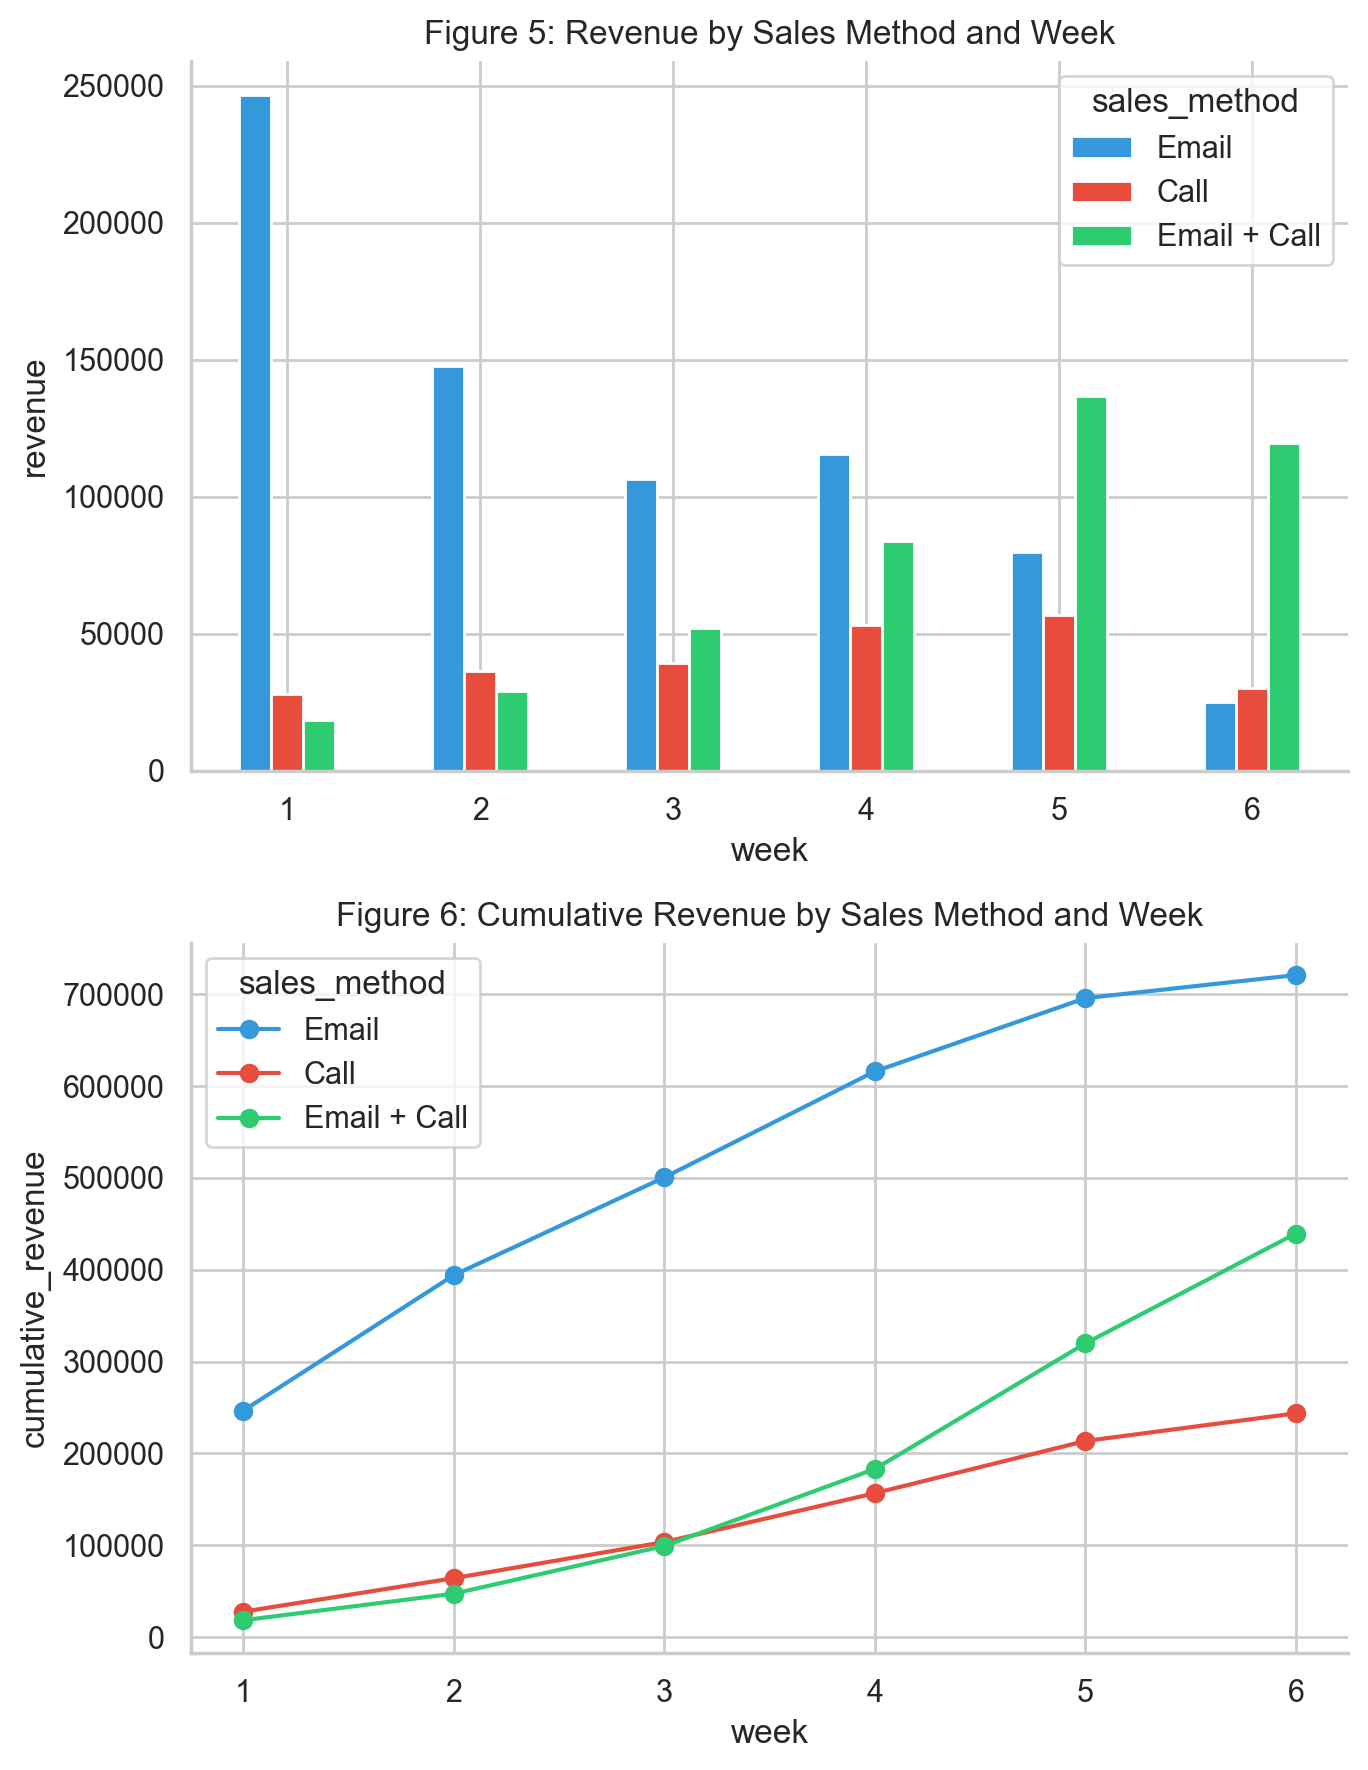

In [26]:
# Create subplots with two columns
fig, axes = plt.subplots(2, 1, figsize=(7, 9))

# Plot the bar chart for revenue in the first subplot
revenue_by_method_week.plot(kind='bar', ax=axes[0], title='Figure 5: Revenue by Sales Method and Week', color=palette)
axes[0].set_xlabel('week')
axes[0].set_ylabel('revenue')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Plot the line graph for cumulative revenue in the second subplot
cummulative_revenue_by_method_week.plot(kind='line', ax=axes[1], marker='o', title='Figure 6: Cumulative Revenue by Sales Method and Week', color=palette)
axes[1].set_xlabel('week')
axes[1].set_ylabel('cumulative_revenue')
plt.tight_layout()

In [27]:
# Calculate average increase in revenue for each approach each week
average_increase_per_approach = {}

# Iterate through the sales methods
for method in ['Email', 'Call', 'Email + Call']:
    method_data = cummulative_revenue_by_method_week[method].values
    weekly_increase = method_data[1:] - method_data[:-1]  # Calculate the weekly revenue differences
    average_increase = weekly_increase.mean()  # Calculate the mean of weekly revenue differences
    average_increase_per_approach[method] = average_increase

# Display the average increase in revenue for each approach each week
print("Average Weekly Increase in Revenue for Each Approach:")
for method, average_increase in average_increase_per_approach.items():
    print(f"- {method}: ${average_increase:.2f}")


Average Weekly Increase in Revenue for Each Approach:
- Email: $94845.51
- Call: $43188.47
- Email + Call: $84217.07


## 2.4. Recommendation on Approach Sales Team Should Continue to Use

After conducting an in-depth Exploratory Data Analysis (EDA), it becomes evident that the "Email + Call" approach stands out as the most effective strategy for the sales team to target. Despite approaching only 2,572 customers in the last 6 weeks, which is one-third of the "Email" approach, it has yielded remarkably high revenue. With an average of \$84,217.07 per week, it compares favorably to the \$94,845.51 generated by the "Email" approach. Moreover, it demands significantly less effort from the sales team when compared to the labor-intensive "Call" approach.

To put this into perspective, if the number of customers approached using the "Email + Call" method were increased threefold to match the number of "Email" approaches, the potential for revenue growth would be substantial.

This recommendation suggests that the sales team should continue to focus on and potentially expand the "Email + Call" approach, as it has demonstrated the capacity to deliver strong results with a more efficient use of resources.

## 2.5. Customer Profiles by Sales Method

From the `Figure 7`, we have some hightlights in the correlation matrix summary:

- **`years_as_customer`**: This variable exhibits weak correlations with other factors, indicating minimal influence on them. The correlation coefficients are close to zero. As a result, this couldn't be the factor contributing to our analysis of customer profiles by sales method.

- **`revenue`**: It displays moderate positive correlations with `nb_sold`, `week`, and `nb_site_visits`, with correlation coefficients of approximately 0.66, 0.34, and 0.31, respectively. This suggests number of new products sold, week and number of site visits all have influence on the growth of the revenue.

- **`week` and `nb_sold`**: These two variables demonstrate a strong positive correlation with a coefficient of around 0.81, signifying a robust positive relationship. As the number of weeks progresses, more new products are sold.

- **`nb_site_visits` and `nb_sold`**: This relationship implies that customers who frequent the website and engage in more site visits are more inclined to make purchases with the correlation coefficient of 0.49.

Furthermore, the `ANOVA` and `Chi-Square Test` results for categorical variables provide valuable insights. According to the ANOVA result, there are no significant differences in revenue among states. Likewise, the Chi-Square Test result suggests that there is no discernible association between the state variable and the sales method variable.

These insights serve as a foundation for further exploration into customer profiles with each sales approach, including aspects related to new product adoption, demographic characteristics, and website engagement, as described in the sections below.

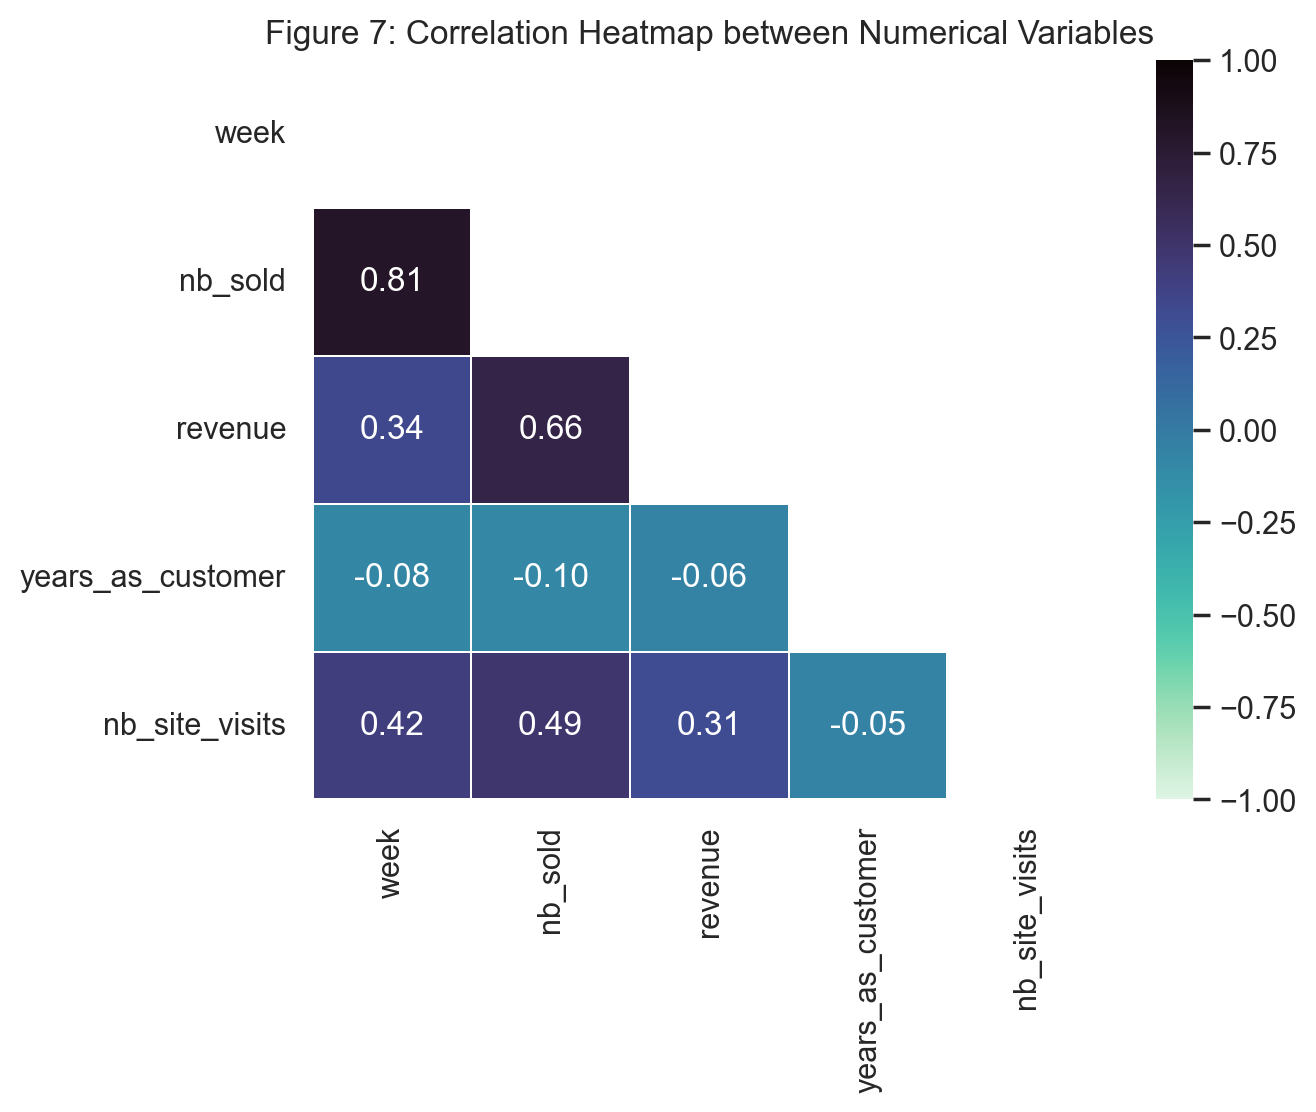

In [28]:
# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap to visualize correlations
sns.heatmap(corr, vmin=-1, vmax=1, cmap='mako_r', mask=np.triu(corr), annot=True, fmt='.2f', linecolor='white', linewidth=0.1)

# Set the title for the heatmap
plt.title("Figure 7: Correlation Heatmap between Numerical Variables");

In [29]:
# Perform ANOVA to test for differences in revenue among states
state_groups = [df[df['state'] == state]['revenue'] for state in df['state'].unique()]
f_statistic, p_value = f_oneway(*state_groups)
if p_value < 0.05:
    print("ANOVA Result: There are significant differences in revenue among states.")
else:
    print("ANOVA Result: No significant differences in revenue among states.")

# Perform the Chi-Square test to check for association between state and sales method

contingency_table = pd.crosstab(df['state'], df['sales_method'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
if p_value < 0.05:
    print("Chi-Square Test Result: There is an association between state and sales method.")
else:
    print("Chi-Square Test Result: No association between state and sales method.")

ANOVA Result: No significant differences in revenue among states.
Chi-Square Test Result: No association between state and sales method.


### 2.5.1. New Product Adoption
(How many new products did the customers buy within the 6-week launch?)

In the `Figure 9`, we explore the distribution of the number of new products adopted by customers within each sales method. These visualizations take the form of cumulative histograms.

- **"Email"**: The cumulative histogram for "Email" indicates that customers in this group exhibit the steepest growth in new product adoption between 8 and 11 products, after which the increase levels off. This suggests that the majority of customers in this group tend to buy around this range of new products.

- **"Call"**: The cumulative histogram for "Call" shares a similar shape, although it is less steep and starts to level off from around 13 new products onwards. This indicates that customers in the "Call" group are less likely to adopt a large number of new products compared to "Email" customers.

- **"Email + Call"**: The unique characteristic of "Email + Call" is the substantial number of customers who purchase between 10 to 16 new products. This is evident in the broader range and more gradual increase in the cumulative histogram, signifying that this group has a diverse pattern of new product adoption. 

- **Total Count**: The total count of new products sold by the "Email + Call" group is the smallest, at around 2800 products, which is significantly less than the counts for "Email" (approximately 7500) and "Call" (roughly 5000).

However, when we consider the revenue associated with these new product purchases, as seen in `Figure 10`, which presents a scatter plot of revenue versus the number of new products sold, split by sales method, we gain further insights:

- "Email + Call" may have the smallest number of new products purchased, but it generates the highest revenue among the three groups. This suggests that customers in this group tend to buy more expensive products.

- "Call" products, while popular in terms of quantity, result in the lowest revenue, indicating that customers in this group tend to purchase less expensive items.

This finding could be really beneficial to the next step in our analysis, which is choosing business metrics to monitor.

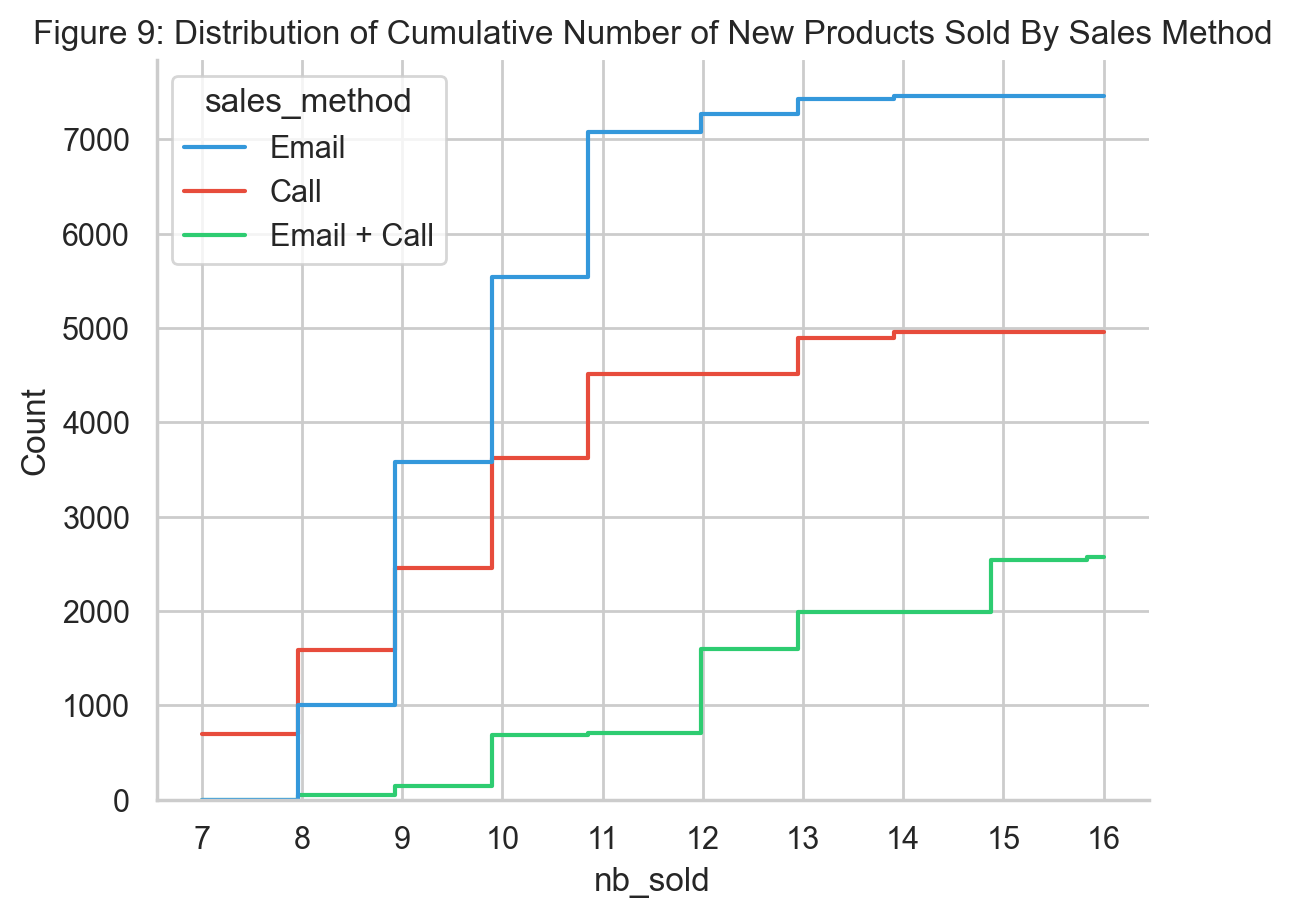

In [30]:
sns.histplot(data=df, x='nb_sold', hue='sales_method', palette=palette, element='step', fill=False, cumulative=True, hue_order=['Email', 'Call', 'Email + Call'])
plt.title("Figure 9: Distribution of Cumulative Number of New Products Sold By Sales Method")
plt.xticks(range(7, 17));

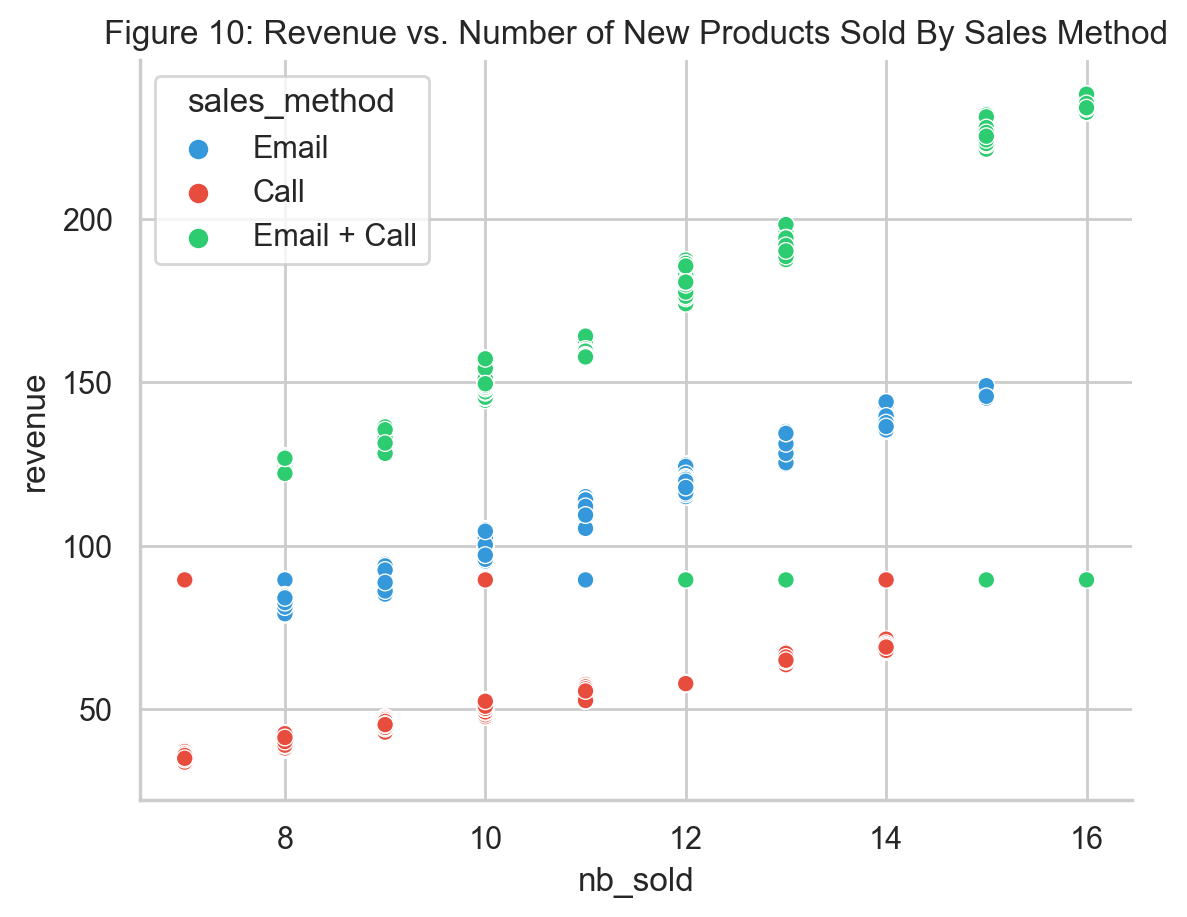

In [31]:
sns.scatterplot(data=df, x='nb_sold', y='revenue', hue='sales_method', palette=palette, hue_order=['Email', 'Call', 'Email + Call'])
plt.title("Figure 10: Revenue vs. Number of New Products Sold By Sales Method");

### 2.5.2. Demographic Insights
( Where do the customers live?)

The Chi-Square test confirms that there is no association between state and sales method. This means that the choice of sales method does not appear to be influenced by the customer's geographic location or state of residence. 

Hence, looking at `Figure 11`, we can focus on the demographic distribution in the most populated and developed states in the US. The top five states are California, Texas, New York, Florida, and Illinois. This information can be valuable for targeted marketing strategies to reach customers in these highly populated areas more effectively.

In [42]:
# Top 10 state where the highest proportion of customers live
round(df['state'].value_counts(normalize=True).head(10)*100,2)

California        12.47
Texas              7.91
New York           6.43
Florida            6.03
Illinois           4.11
Pennsylvania       3.99
Ohio               3.77
Michigan           3.32
Georgia            3.26
North Carolina     3.06
Name: state, dtype: float64

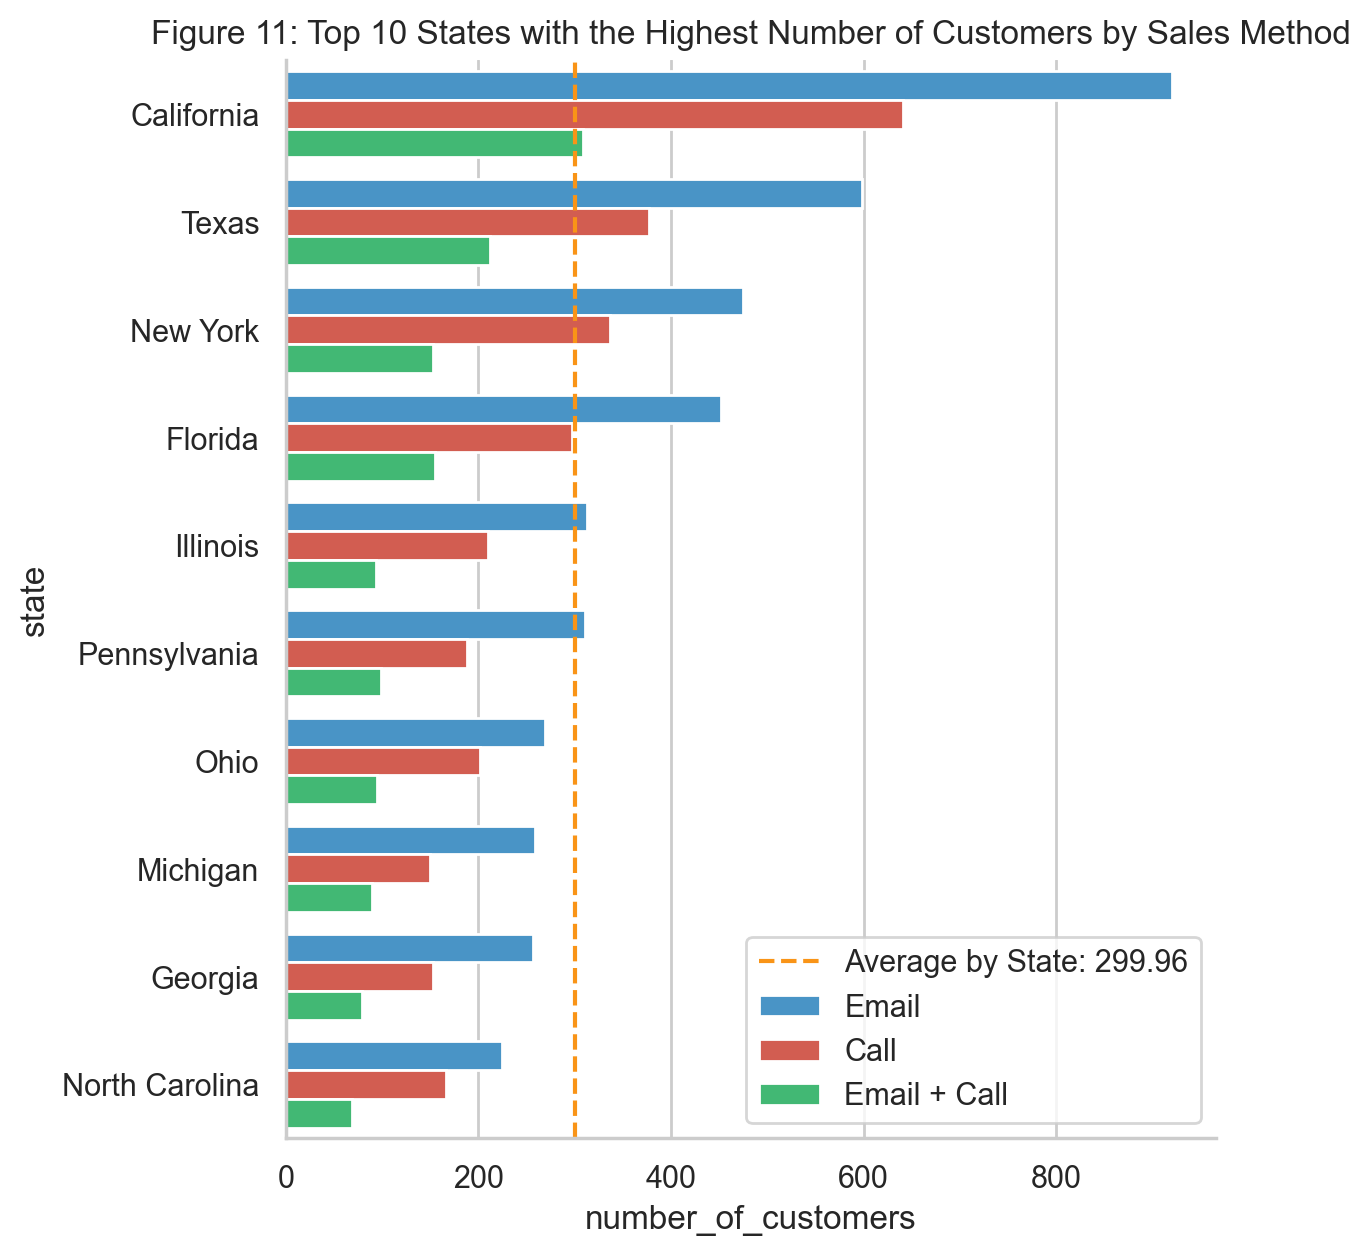

In [32]:
top_10_states = df['state'].value_counts().head(10).index
plt.figure(figsize=(6,7))
sns.countplot(data=df[df['state'].isin(top_10_states)], y='state', hue='sales_method', order = top_10_states, palette=palette)
plt.title("Figure 11: Top 10 States with the Highest Number of Customers by Sales Method")
plt.xlabel("number_of_customers")
average_count = df['state'].value_counts().mean()
plt.axvline(average_count, linestyle='--', color='#F99417', label = f'Average by State: {average_count}')
plt.legend();

### 2.5.3. Website Engagement Over the Last 6 Months
(How often did the customers check the website in the last 6 months?)

Examining the insights from `Figure 12` and `Figure 13`, it becomes evident that "Email + Call" shows a slightly broader range of site visit numbers. This suggests that customers approached through both Email and Call tend to visit the website more frequently than others. In general, while there are some variations in the distribution of site visits with each sales method, the differences aren't substantial, except for the "Email + Call" approach, which has a higher average number of visits.

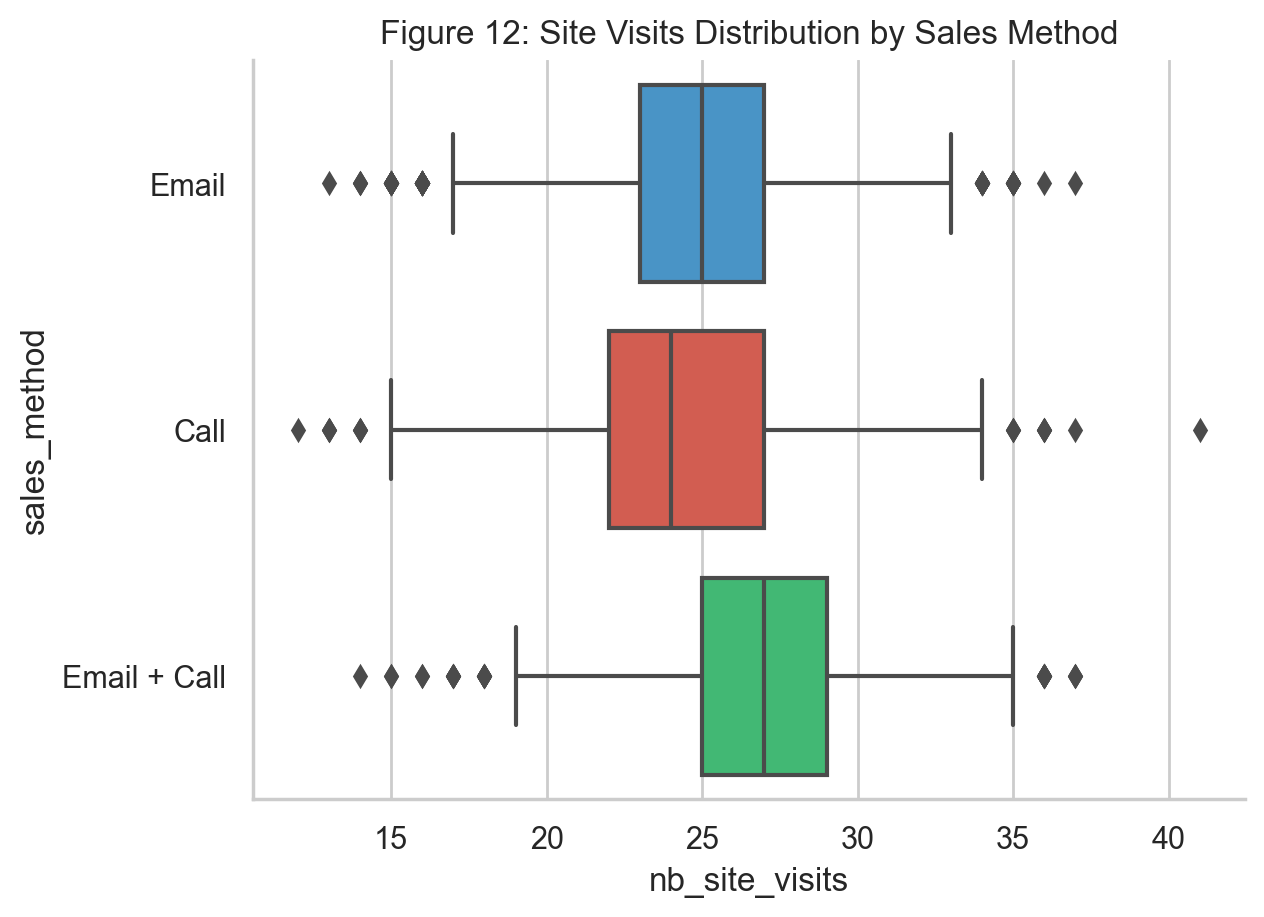

In [33]:
sns.boxplot(data=df, x='nb_site_visits', y='sales_method', palette=palette, order =['Email', 'Call', 'Email + Call'])
plt.title("Figure 12: Site Visits Distribution by Sales Method");

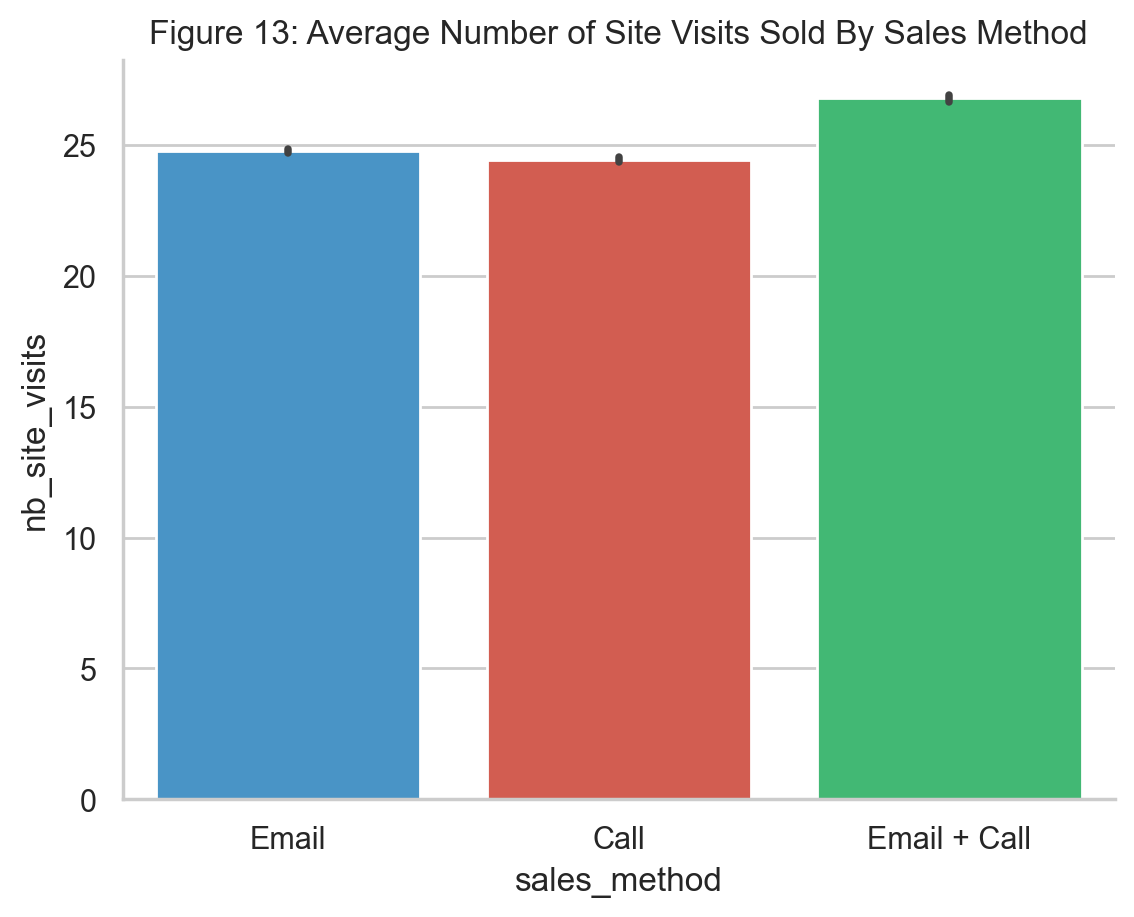

In [34]:
sns.barplot(data=df, y='nb_site_visits', x='sales_method', palette=palette, order=['Email', 'Call', 'Email + Call'])
plt.title("Figure 13: Average Number of Site Visits Sold By Sales Method");

# III. Business Metrics to Monitor


## 3.1. Metric Definition
- **`Metric`**: Average Revenue per Customer by Sales Method
- **Definition**: The "Average Revenue per Customer by Sales Method" metric is defined as the average revenue generated from customers for each of the different sales methods employed by the business. It measures the effectiveness of each sales approach ("Email," "Call," and "Email + Call") in terms of revenue contribution per customer.


## 3.2. How to Use the Metric
In the previous EDA section, we uncovered that customers within each sales group exhibit varying preferences for products at different price points. Understanding this distinction is crucial for creating targeted marketing strategies and promotions that align with the customers' affordability and needs.

To effectively utilize this metric, businesses can leverage the insights gained from analyzing the distribution of new product adoption within each sales method in combination with demographic distribution. 

The "Average Revenue per Customer by Sales Method" metric serves as a valuable tool for businesses to evaluate the revenue generation effectiveness of each sales method, including "Email," "Call," and "Email + Call." Monitoring this metric enables data-driven decisions regarding resource allocation, sales strategies, and customer segmentation.

By continuously tracking and analyzing this metric, businesses can refine their approach and adapt to changing customer behaviors, ultimately improving their revenue generation strategies.


## 3.3. Initial Metric Values
Based on the current 6-week data and my calculation below, here are the estimated initial values for the "Average Revenue per Customer by Sales Method" metric:
- **Email + Call**: $170.88 per customer
- **Email**: $96.57 per customer
- **Call**: $49.13 per customer

These values align with our previous analysis, where "Email + Call" stands out as the most profitable approach, generating an average revenue of \$170.88 per customer. "Email" and "Call" follow with \$96.57 and \$49.13, respectively.

These initial values provide a valuable benchmark for the business. They can be used as a baseline to set performance targets and to monitor changes in revenue generation in subsequent weeks or future marketing campaigns.

In [44]:
# Group the data by 'sales_method' and 'customer_id' and calculate the total revenue
revenue_by_customer = df.groupby(['sales_method', 'customer_id'])['revenue'].sum().reset_index()
# Calculate the average revenue per customer for each sales method
average_revenue_by_method = revenue_by_customer.groupby('sales_method')['revenue'].mean().sort_values(ascending=False).round(2)

print(average_revenue_by_method)

sales_method
Email + Call    170.88
Email            96.57
Call             49.13
Name: revenue, dtype: float64


# IV. Summary and Final Recommendations

After a comprehensive analysis of the provided data, we have gained valuable insights into the performance of different sales methods employed by the business. Here is a summary of our findings and the corresponding recommendations for the business

## 4.1. Summary

### 4.1.1. Revenue Analysis
- **Sales Method Performance**: "Email + Call" outperforms both "Email" and "Call" in terms of revenue generation. While "Email" has a higher customer count, the revenue generated by "Email + Call" surpasses it, suggesting a more effective approach.

### 4.1.2. Time Trends
- **Revenue Trends Over Time**: "Email" shows an initial high revenue but decreases over time, while "Call" and "Email + Call" exhibit increasing revenues. "Email" may be more effective in the initial weeks, but "Email + Call" becomes more lucrative over time.

### 4.1.3. Customer Profiles by Sales Method
- **New Product Adoption**: Each sales method group exhibits different patterns in new product adoption. "Email + Call" customers tend to buy a wider range of products, while "Call" customers buy fewer products.
- **Demographic Insights**: The choice of sales method does not appear to be influenced by the customer's geographic location or state of residence.
- **Website Engagement**: "Email + Call" customers tend to visit the website more frequently, but the differences in site visits among sales methods are not substantial.

### 4.1.4. Metric for Monitoring
- **Average Revenue per Customer by Sales Method**: This metric should be continuously monitored to assess the revenue generation effectiveness of each sales method. It enables data-driven decisions on resource allocation, sales strategy, and customer segmentation.

## 4.2. Recommendations
- **Emphasize "Email + Call"**: Given its superior revenue performance over time, the business should consider allocating more resources and focus on the "Email + Call" approach. This approach has the potential to maximize revenue and reach a broader customer base.

- **Tailored Marketing Strategies**: Utilize the insights from the "New Product Adoption" analysis to tailor marketing strategies and promotions for each sales method. Understand the typical price range of products preferred by each customer group and target promotions accordingly.

- **Geographic Focus**: As there is no discernible association between state and sales method, the business should focus on the demographic distribution in highly populated and developed states, such as California, Texas, New York, Florida, and Illinois, for more effective targeting.

- **Continuous Monitoring**: Regularly track and analyze the "Average Revenue per Customer by Sales Method" metric to refine sales strategies and adapt to changing customer behaviors. This will lead to improved revenue generation strategies over time.

By implementing these recommendations and considering the insights gained from our analysis, the business can optimize its sales methods, better understand customer preferences, and enhance revenue generation efforts. This data-driven approach will position the business for sustained growth and success.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation